In [195]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep

In [196]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst'
SSTdate='2022-10-2'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f)) and (f[-4:]=='.npy') and (f[:13]=='SST_'+SSTdate) and (f[13] in ['1'])]
    print(len(files),files[0])
for i,f in enumerate(files):
    print(i,f)
#tmin=int(files[0][18:18+2])
#tsec=int(files[0][21:21+2])
#print(tmin,tsec)
tsec=int(files[0][18:18+2])*60+int(files[0][21:21+2])
print("time offset %is"%tsec)

24 SST_2022-10-21-00-53-49.npy
0 SST_2022-10-21-00-53-49.npy
1 SST_2022-10-21-01-53-49.npy
2 SST_2022-10-21-02-53-49.npy
3 SST_2022-10-21-03-53-49.npy
4 SST_2022-10-21-04-53-49.npy
5 SST_2022-10-21-05-53-49.npy
6 SST_2022-10-21-06-53-49.npy
7 SST_2022-10-21-07-53-49.npy
8 SST_2022-10-21-08-53-49.npy
9 SST_2022-10-21-09-53-49.npy
10 SST_2022-10-21-10-53-49.npy
11 SST_2022-10-21-11-53-49.npy
12 SST_2022-10-21-12-53-49.npy
13 SST_2022-10-21-13-53-49.npy
14 SST_2022-10-21-14-53-49.npy
15 SST_2022-10-21-15-53-49.npy
16 SST_2022-10-21-16-53-49.npy
17 SST_2022-10-21-17-53-49.npy
18 SST_2022-10-21-18-53-49.npy
19 SST_2022-10-21-19-53-49.npy
20 SST_2022-10-21-20-53-49.npy
21 SST_2022-10-21-21-53-49.npy
22 SST_2022-10-21-22-53-49.npy
23 SST_2022-10-21-23-53-49.npy
time offset 3229s


In [197]:
freqs=np.arange(512)/512*100
freq1=40;i1=np.argmin(np.abs(freqs-freq1))
freq2=70;i2=np.argmin(np.abs(freqs-freq2))
freq3=62;i3=np.argmin(np.abs(freqs-freq3))
#print(i2,i1,freqs[i1],freqs[i2])

In [198]:

D=[]
flist=[]
for f in files[:]:
  print(f)
  D2=np.load(fpath+'/'+f)[:,:18,:]
  ns=D2.shape
#  print(ns)
  if ns[0]!=3600: continue;
  D2=D2.reshape(ns[0]//600,600,ns[1],ns[2])
  D2=np.percentile(D2,50,axis=1)
  D.append(D2)
  flist.append(f)
  print("    ",D[-1].shape)
D=np.array(D)
print(D.shape)
ns=D.shape
D=D.reshape([ns[0]*ns[1],ns[2],ns[3]])
print(D.shape)


SST_2022-10-21-00-53-49.npy
     (6, 18, 512)
SST_2022-10-21-01-53-49.npy
     (6, 18, 512)
SST_2022-10-21-02-53-49.npy
     (6, 18, 512)
SST_2022-10-21-03-53-49.npy
     (6, 18, 512)
SST_2022-10-21-04-53-49.npy
     (6, 18, 512)
SST_2022-10-21-05-53-49.npy
     (6, 18, 512)
SST_2022-10-21-06-53-49.npy
     (6, 18, 512)
SST_2022-10-21-07-53-49.npy
     (6, 18, 512)
SST_2022-10-21-08-53-49.npy
     (6, 18, 512)
SST_2022-10-21-09-53-49.npy
     (6, 18, 512)
SST_2022-10-21-10-53-49.npy
     (6, 18, 512)
SST_2022-10-21-11-53-49.npy
     (6, 18, 512)
SST_2022-10-21-12-53-49.npy
     (6, 18, 512)
SST_2022-10-21-13-53-49.npy
     (6, 18, 512)
SST_2022-10-21-14-53-49.npy
     (6, 18, 512)
SST_2022-10-21-15-53-49.npy
     (6, 18, 512)
SST_2022-10-21-16-53-49.npy
     (6, 18, 512)
SST_2022-10-21-17-53-49.npy
     (6, 18, 512)
SST_2022-10-21-18-53-49.npy
     (6, 18, 512)
SST_2022-10-21-19-53-49.npy
     (6, 18, 512)
SST_2022-10-21-20-53-49.npy
     (6, 18, 512)
SST_2022-10-21-21-53-49.npy
     (

In [204]:
sky=np.load("../L2TS_cal/Sky40.npy")
skyhour=np.arange(24*60/15)/4
print(sky.shape,len(skyhour))

(2, 96) 96


istart= 0 0.0
205 0.7453562189360952 845 2.3472222222222223


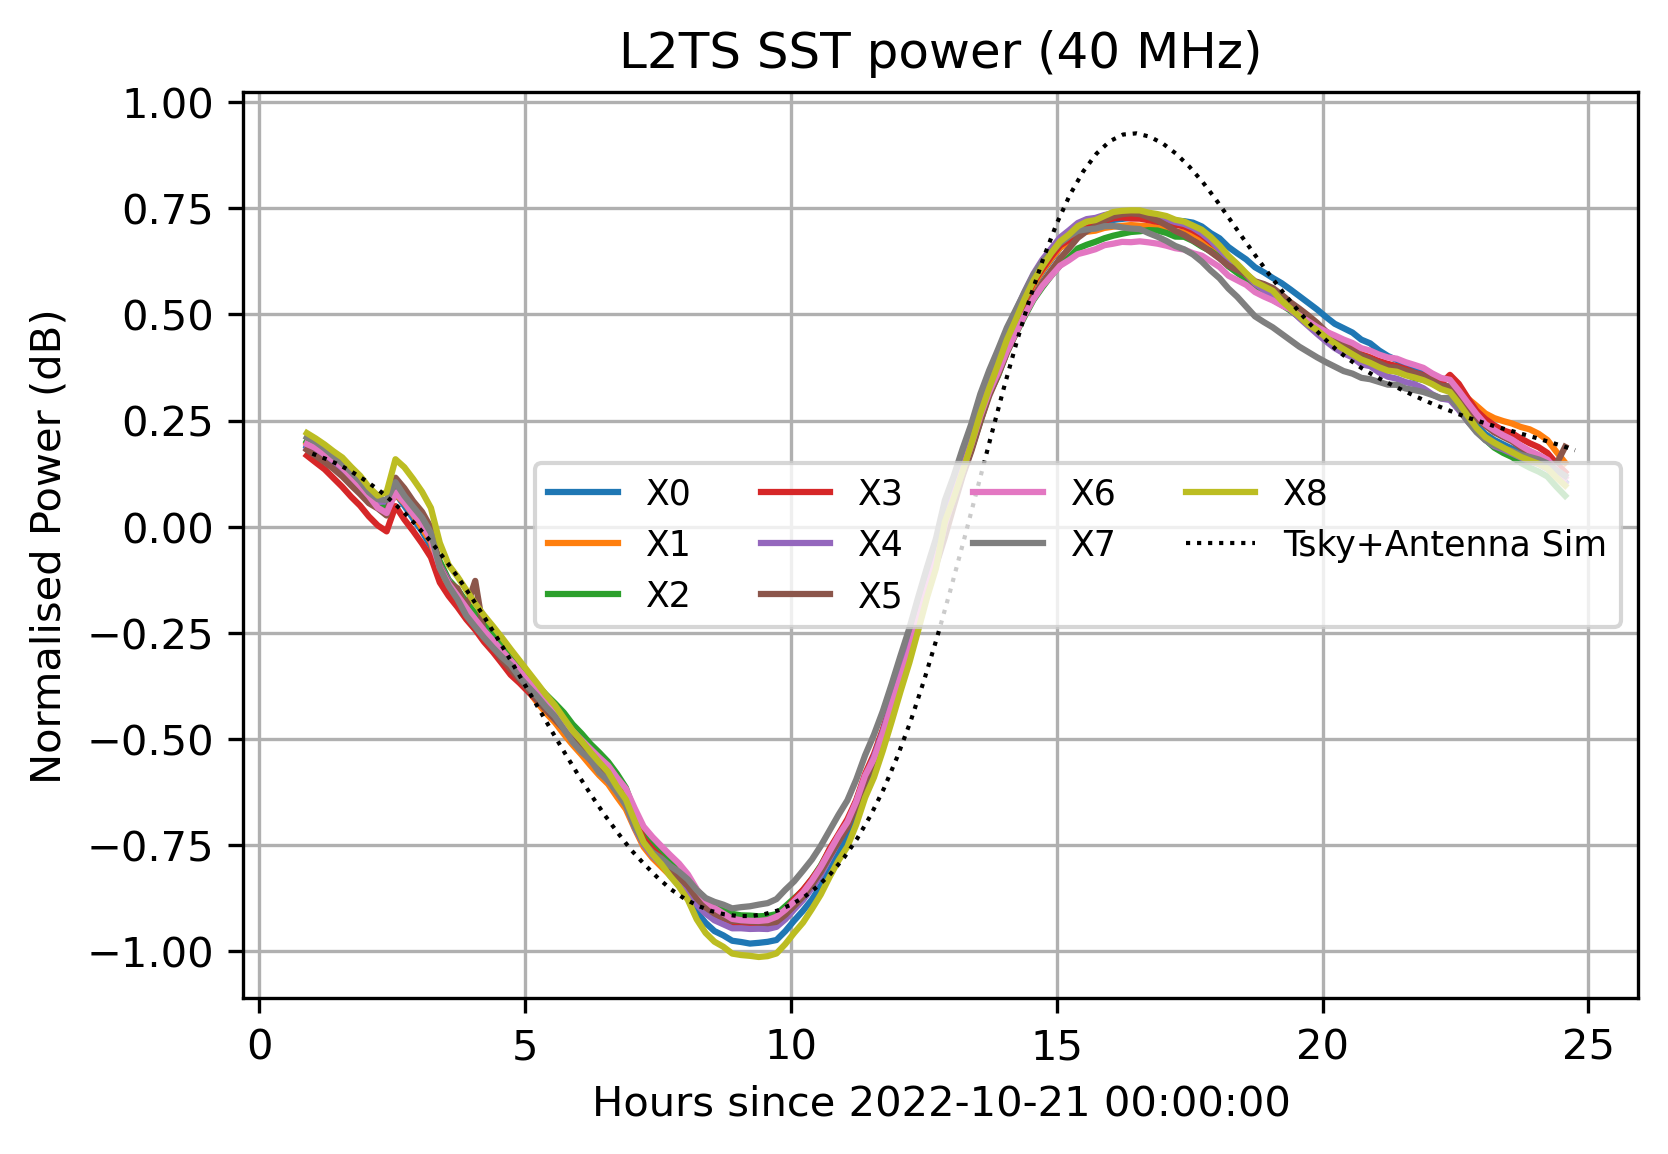

In [210]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/6+tsec/60/60
istart=0#20*360
istop=-1#int(21.6*360)
print("istart=",istart,istart/360)
for i in [i1]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(9):
        plt.plot(hour_of_day[istart:istop],Pwr[:,l],label='X%i'%l);
    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
#plt.xlim(0,24)
#plt.ylim(-60,-40)
plt.gca().set_prop_cycle(None)
skyP=10*np.log10(sky[0,:])
#skyP=np.mean(skyP,axis=0)
skyP-=np.mean(skyP)
plt.plot(skyhour+1,skyP.T,'k:',linewidth=1,label='Tsky+Antenna Sim')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since 2022-10-21 00:00:00')
plt.title("L2TS SST power (40 MHz)")
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


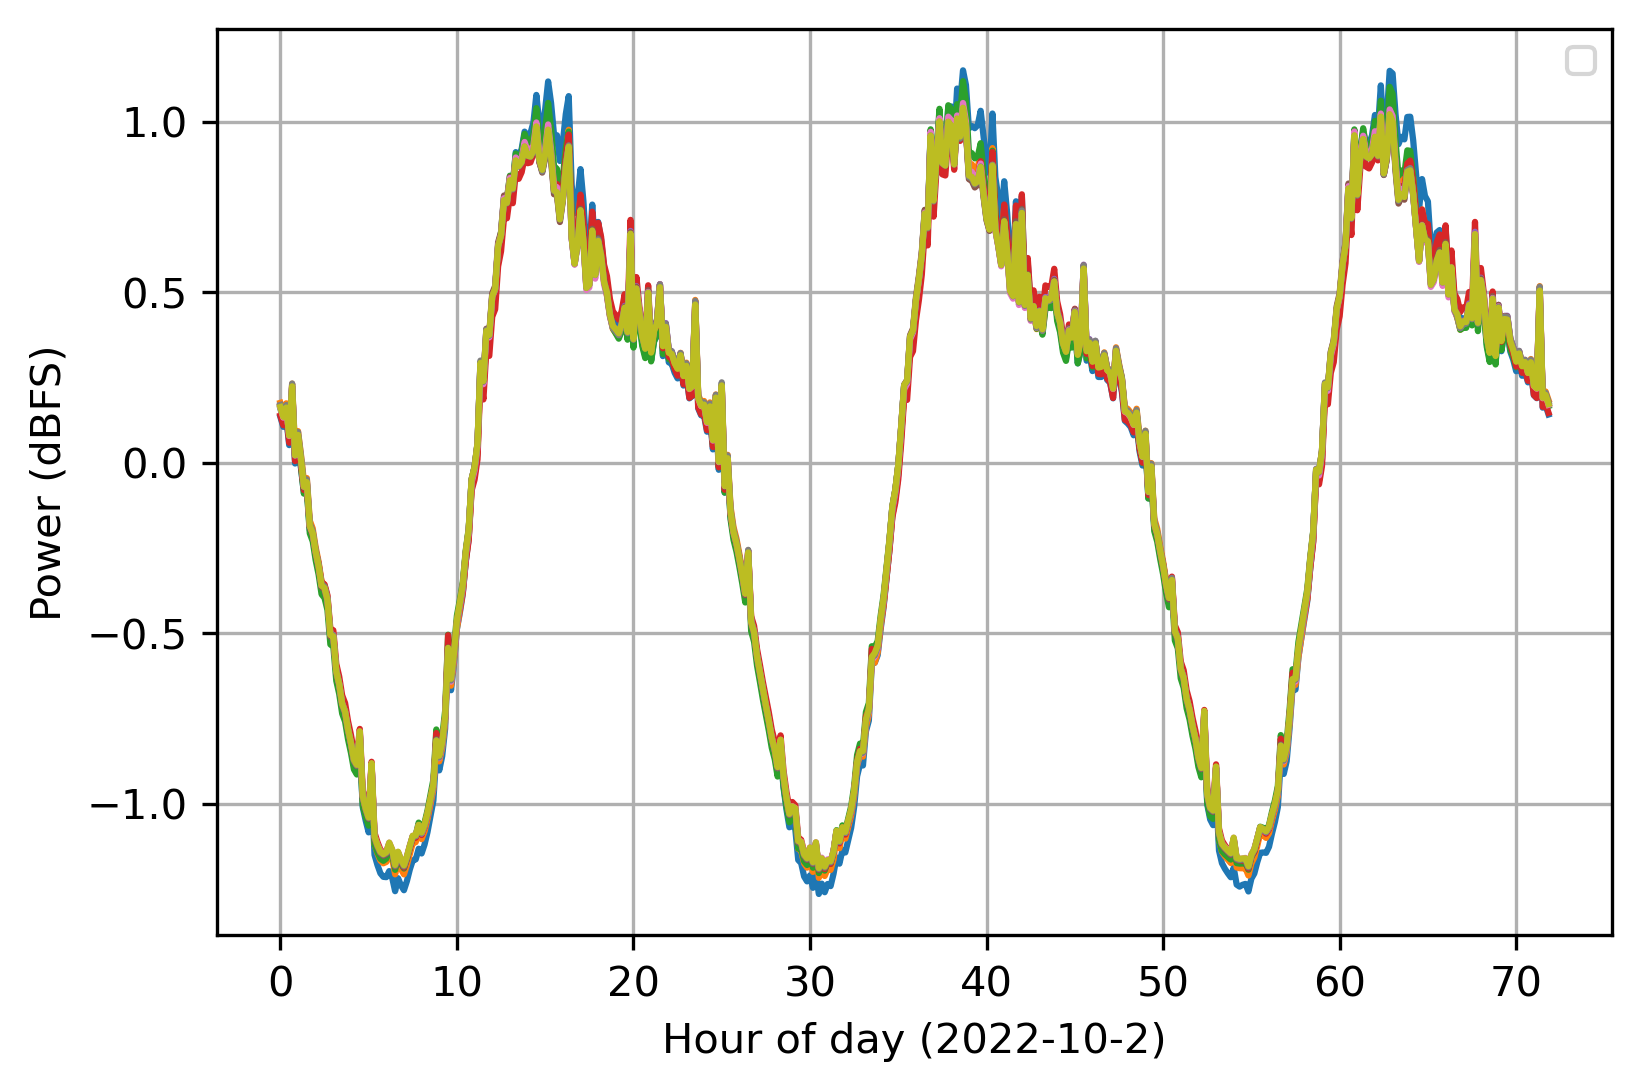

In [128]:
plt.figure(dpi=300)
skyP=10*np.log10(sky[:,0])
skyP-=np.mean(skyP,axis=1)[:,np.newaxis]
plt.plot(skyhour,skyP.T,'-')
plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('Hour of day (%s)'%SSTdate)
plt.grid()

358 1.2637789655242386 916 2.5444444444444443


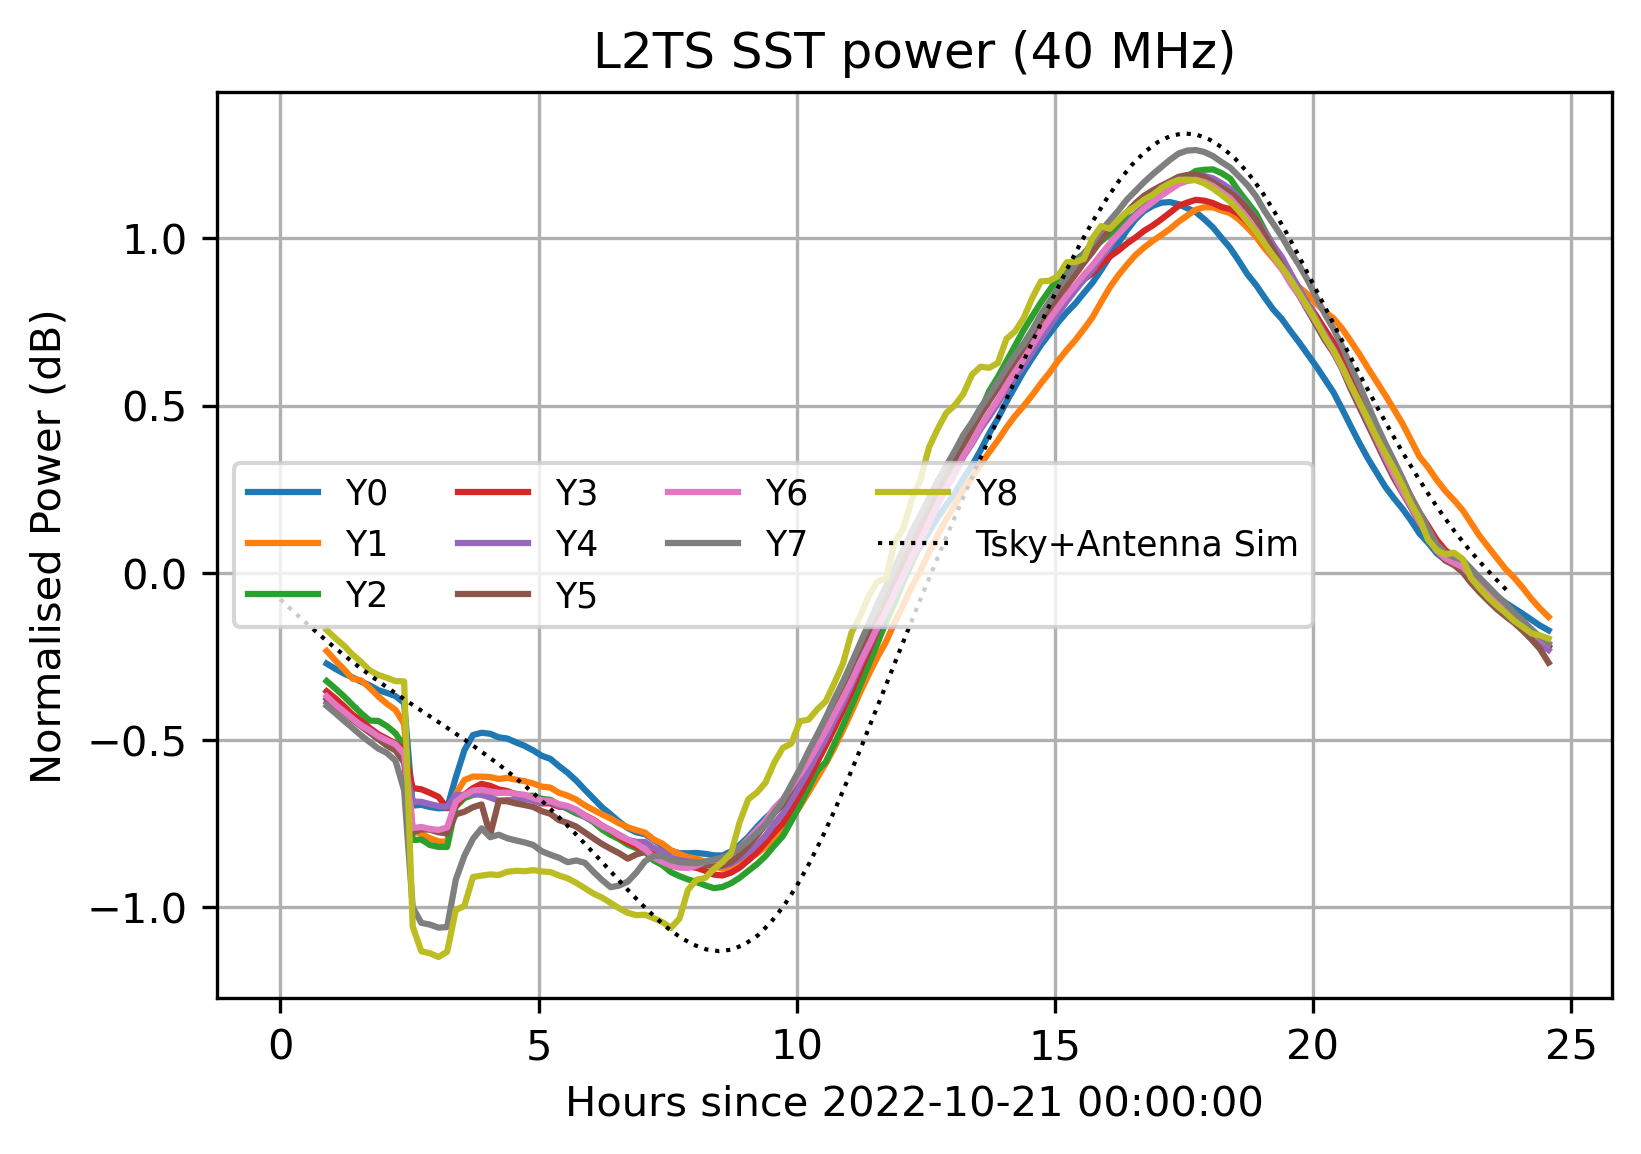

In [213]:
plt.figure(dpi=300)
for i in [i2]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[istart:istop,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(9):
        plt.plot(hour_of_day[istart:istop],Pwr[:,l],label='Y%i'%l);
    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
#plt.xlim(0,24)
#plt.ylim(-60,-40)
plt.gca().set_prop_cycle(None)
skyP=10*np.log10(sky[1,:])
#skyP=np.mean(skyP,axis=0)
skyP-=np.mean(skyP)
plt.plot(skyhour,skyP.T,'k:',linewidth=1,label='Tsky+Antenna Sim')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since 2022-10-21 00:00:00')
plt.title("L2TS SST power (40 MHz)")
plt.grid()

In [220]:
skyD=np.load("../L2TS_cal/SkyPwrFreq2022-10-21-15-00-00.npz")

15.063611111111111


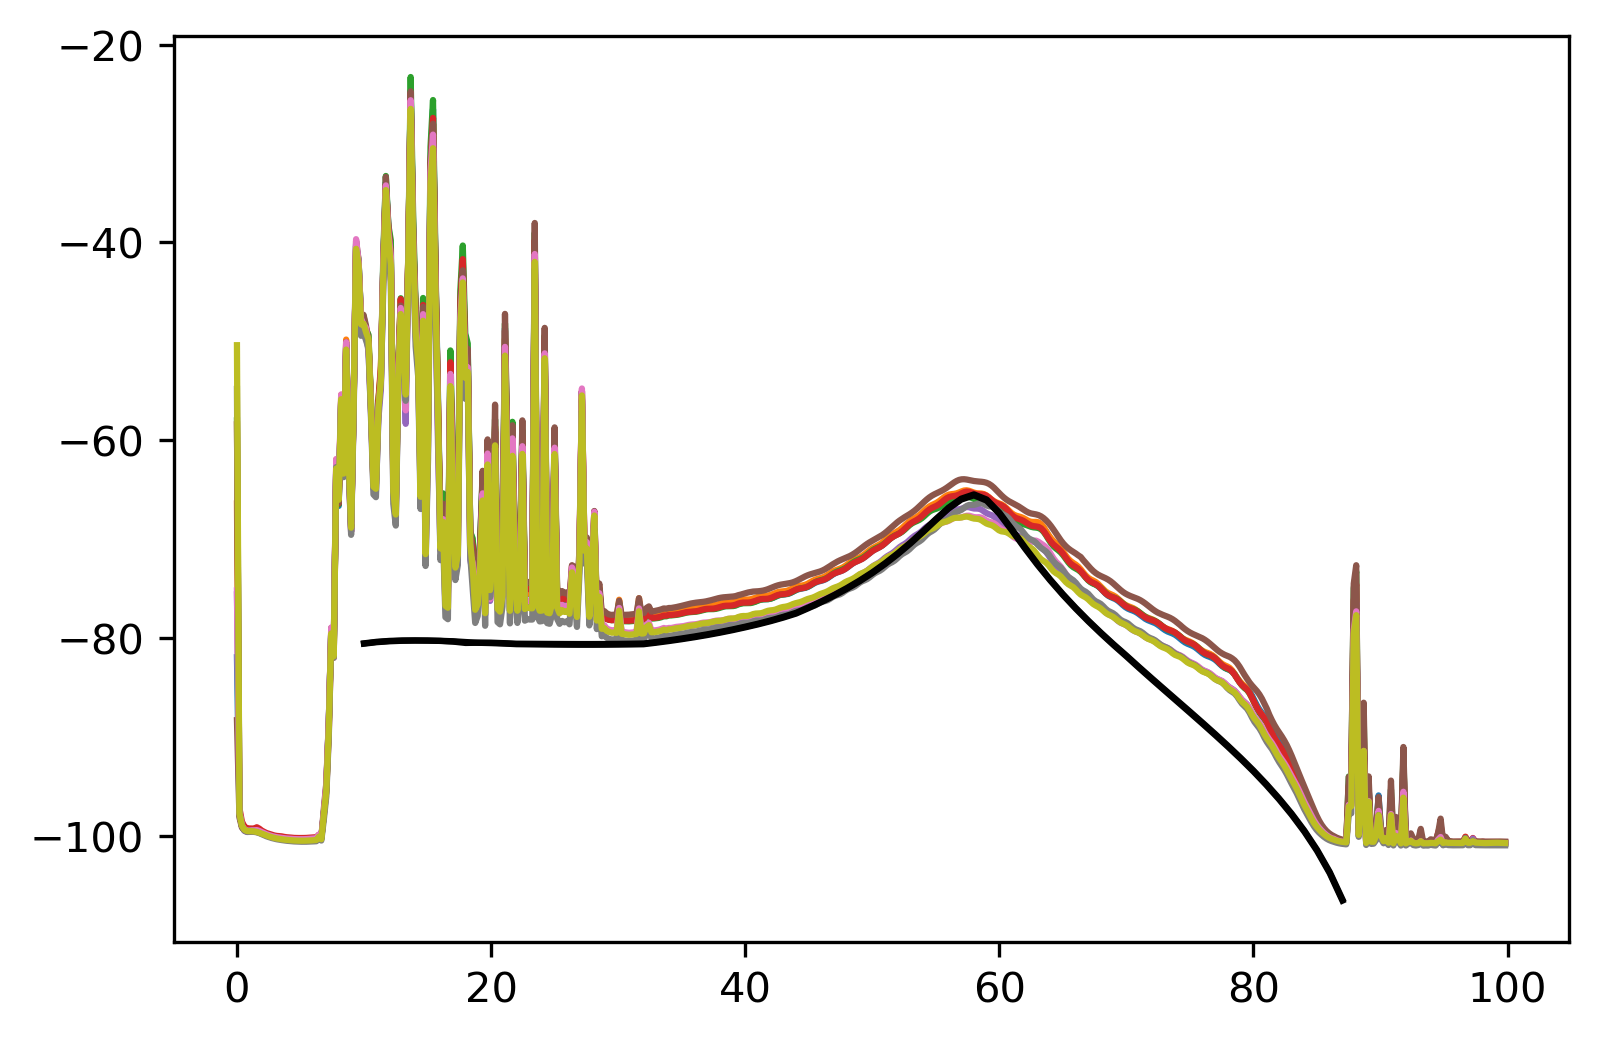

In [226]:
plt.figure(dpi=300)
ihour=np.argmin(np.abs(hour_of_day-15))
print(hour_of_day[ihour])
Pwr=(10*np.log10(D[ihour,1::2,:]))-GainADC
plt.plot(freqs,Pwr.T);
plt.plot(skyD['freq'],10*np.log10(skyD['pwr'])-170,'k-')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


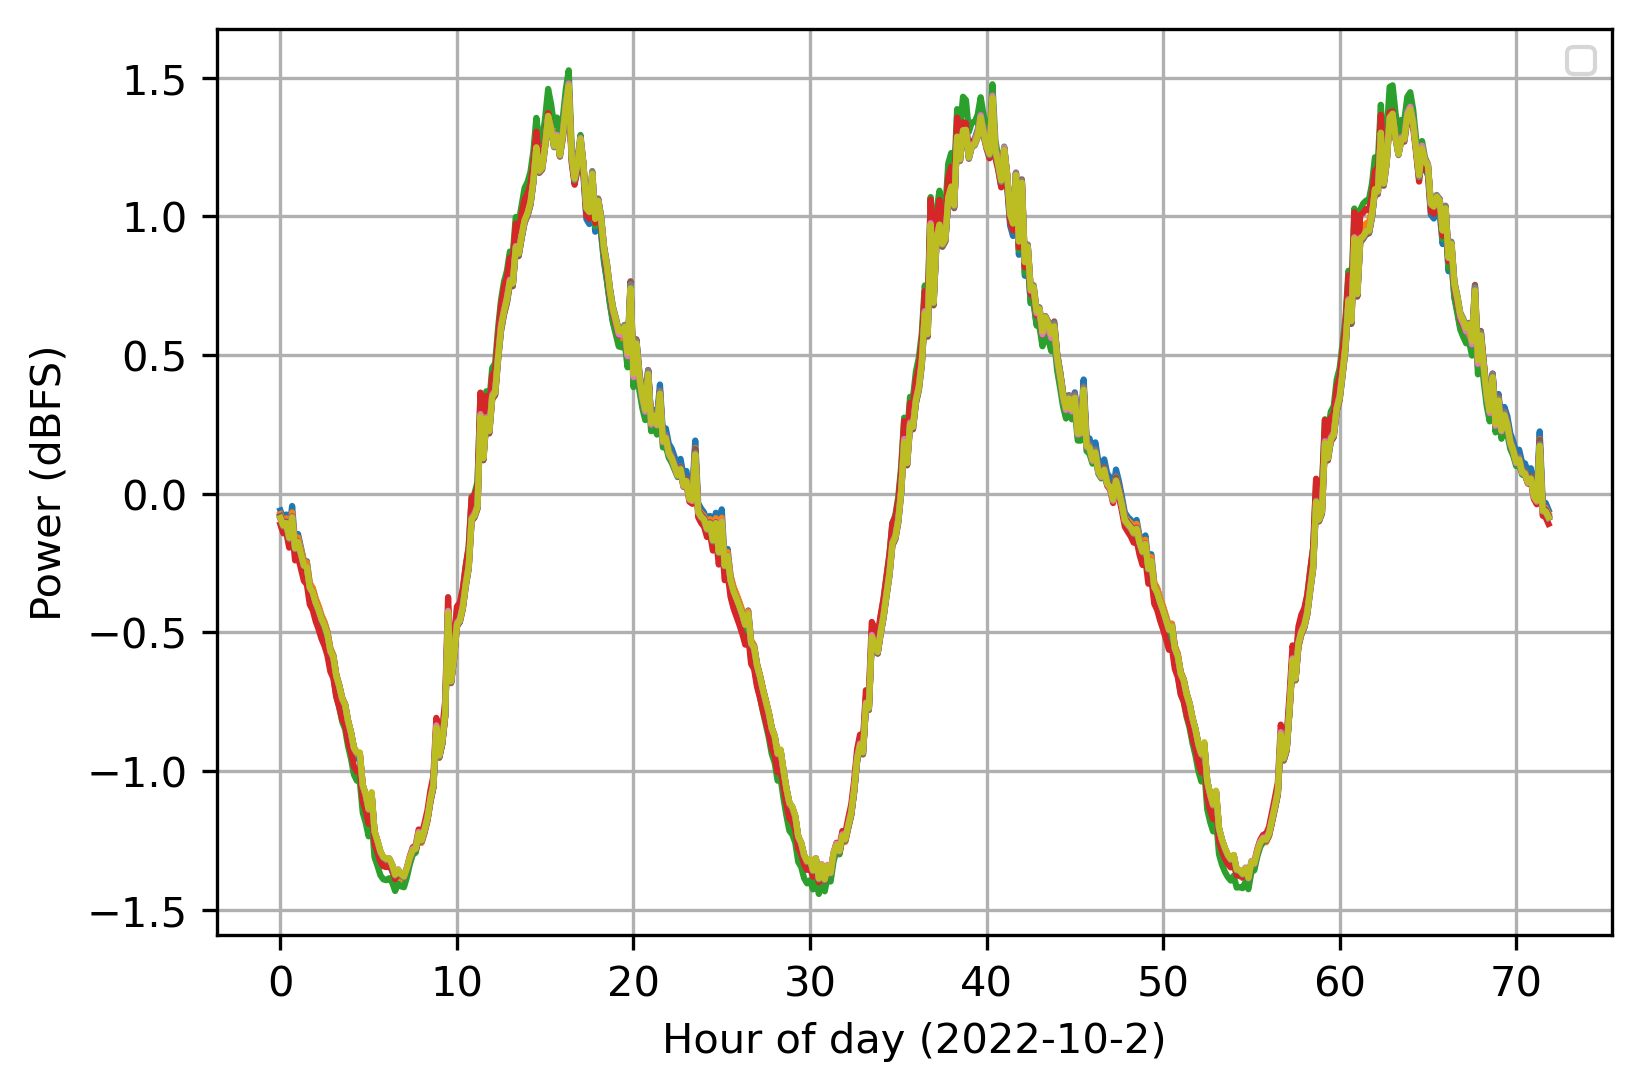

In [130]:
plt.figure(dpi=300)
skyP=10*np.log10(sky[:,1])
skyP-=np.mean(skyP,axis=1)[:,np.newaxis]
plt.plot(skyhour,skyP.T,'-')
plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('Hour of day (%s)'%SSTdate)
plt.grid()

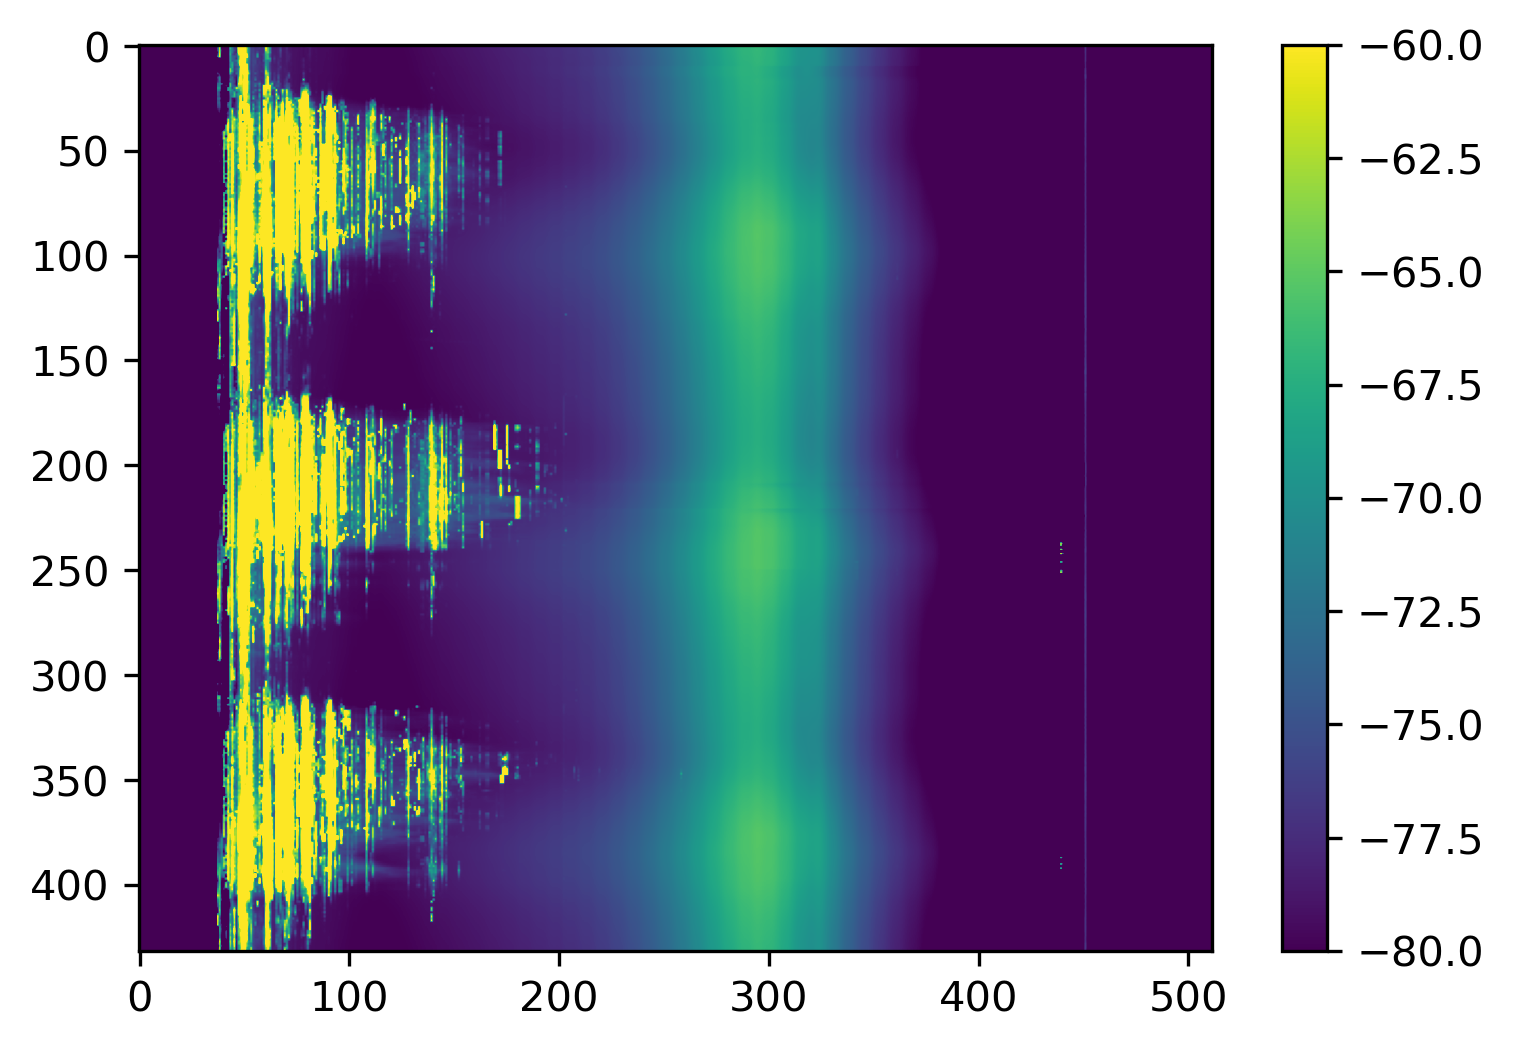

In [81]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
plt.colorbar()

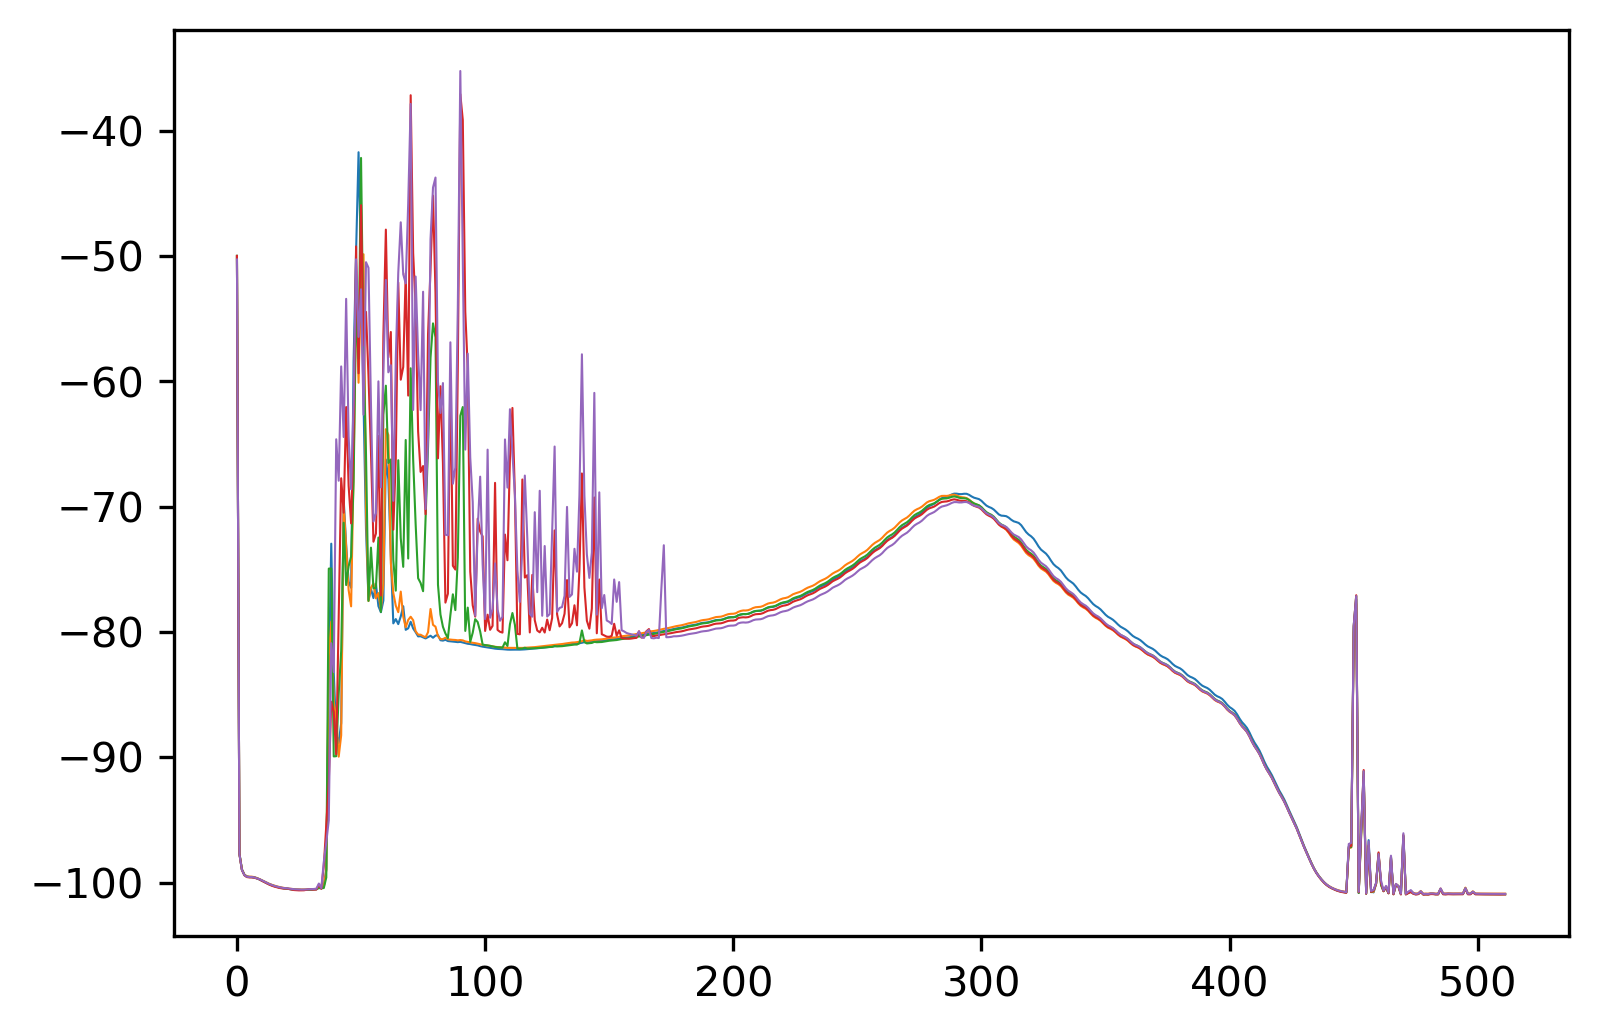

In [109]:
pwr3=10*np.log10(D[:,17,:])-GainADC
plt.figure(dpi=300)
for x in range(5):
    plt.plot(np.mean(pwr3[(x*10+0):(x*10+10)],axis=0),linewidth=0.5)

In [181]:

D3=[]
flist=[]
for f in files[:4]:
  print(f)
  D2=np.load(fpath+'/'+f)[:,:18,:]
  ns=D2.shape
#  print(ns)
  if ns[0]!=3600: continue;
  D2=D2.reshape(ns[0]//10,10,ns[1],ns[2])
  D2=np.percentile(D2,50,axis=1)
  D3.append(D2)
  flist.append(f)
  print("    ",D3[-1].shape)
D3=np.array(D3)
print(D3.shape)
ns=D3.shape
D3=D3.reshape([ns[0]*ns[1],ns[2],ns[3]])
print(D3.shape)


SST_2022-10-21-00-53-49.npy
     (360, 18, 512)
SST_2022-10-21-01-53-49.npy
     (360, 18, 512)
SST_2022-10-21-02-53-49.npy
     (360, 18, 512)
SST_2022-10-21-03-53-49.npy
     (360, 18, 512)
(4, 360, 18, 512)
(1440, 18, 512)


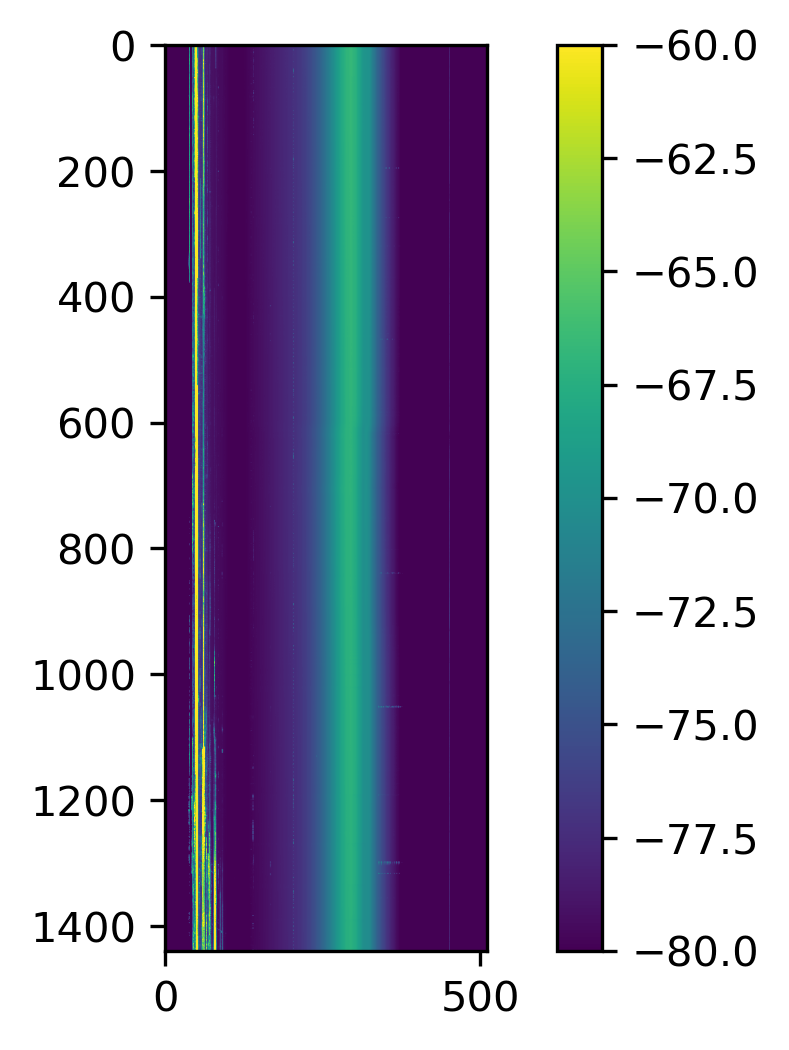

In [192]:
plt.figure(dpi=300)
pwr3=10*np.log10(D3[:,1,:])-GainADC
plt.imshow(pwr3,vmin=-80,vmax=-60)
plt.colorbar()

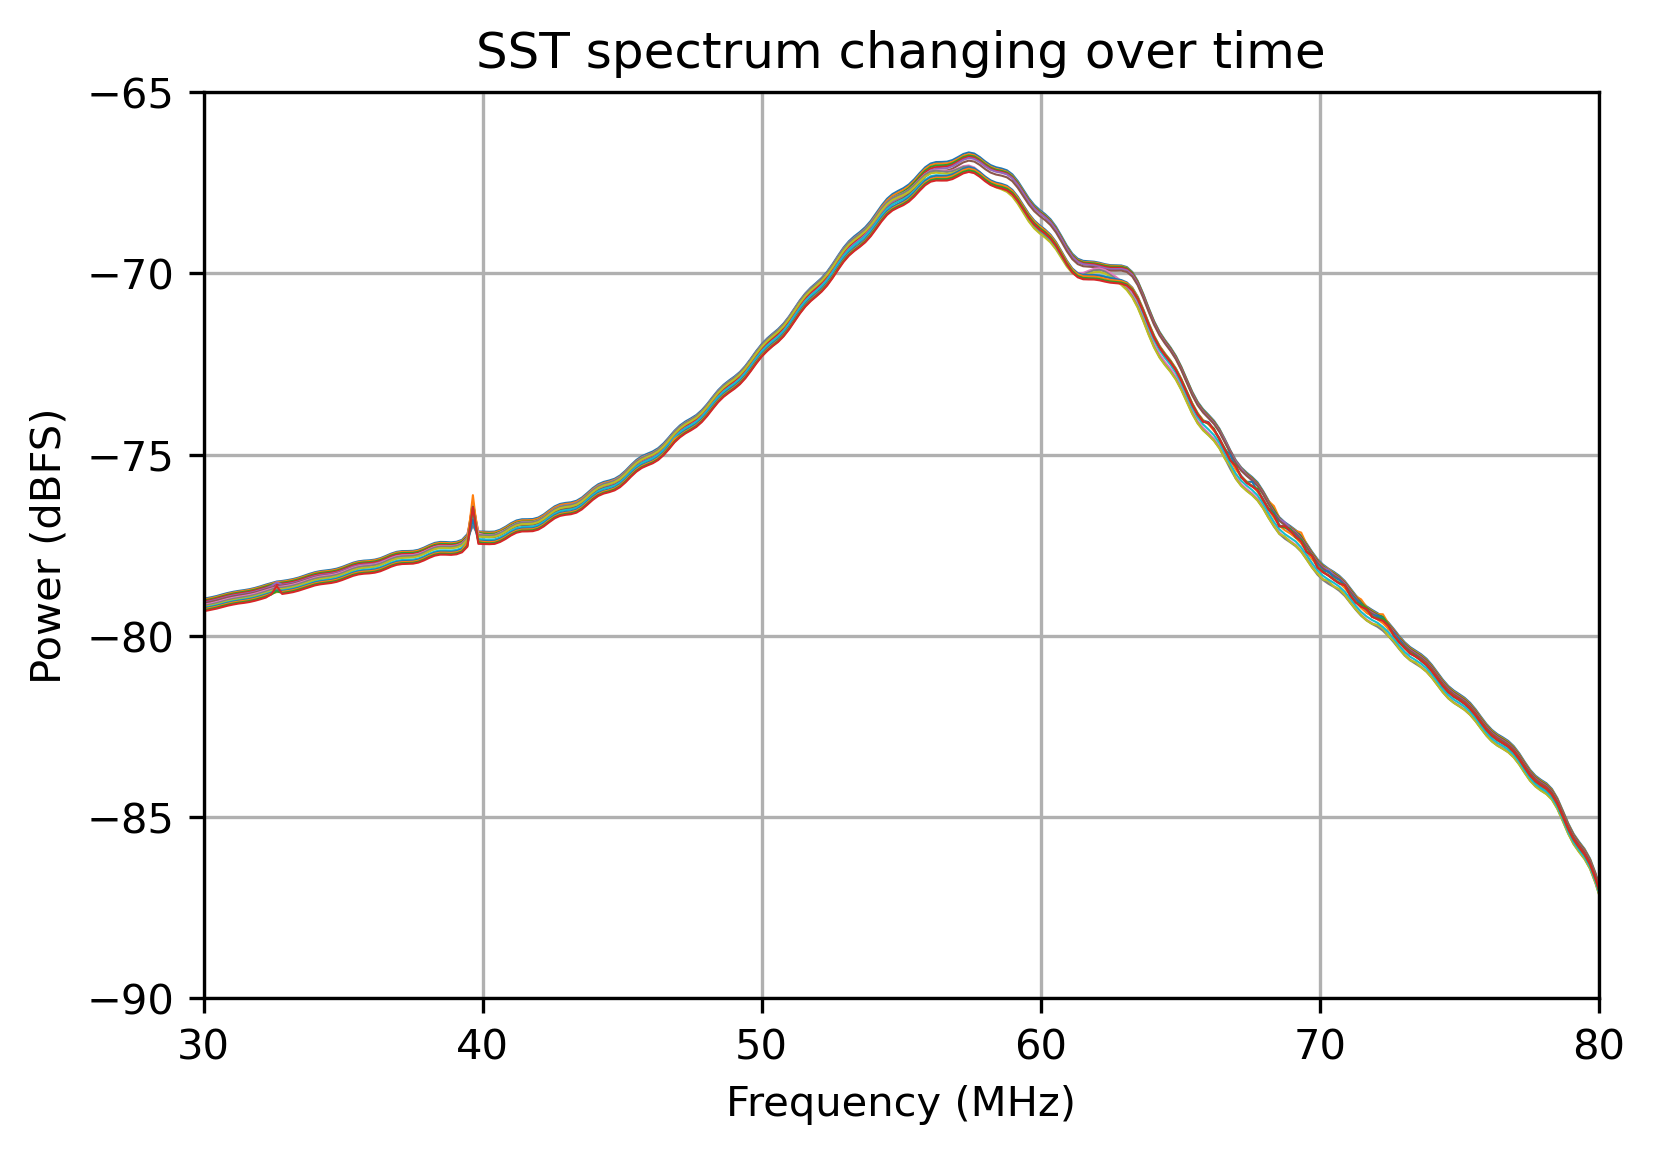

In [193]:
plt.figure(dpi=300)
for x in range(14):
    plt.plot(freqs,np.mean(pwr3[(x*100+0):(x*100+100)],axis=0),linewidth=0.5)
plt.ylim(-90,-65)
plt.xlim(30,80)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBFS)")
plt.title("SST spectrum changing over time")
plt.grid()

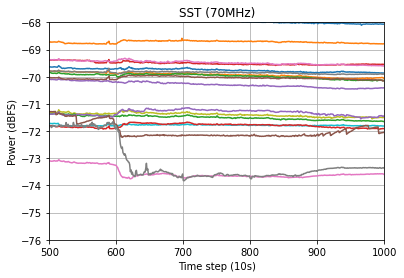

In [191]:
P4=10*np.log10(D3[:,::,i3])-GainADC
plt.plot(P4)
plt.ylim(-76,-68)
plt.xlim(500,1000)
plt.ylabel("Power (dBFS)")
plt.xlabel("Time step (10s)")
plt.title("SST (70MHz)")
plt.grid()